In [3]:
# Importing the needed modules
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
#%matplotlib inline

In [30]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [31]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass

print(numericalVars)
print(categoricalVars)

for categoricalCol in categoricalVars:
    print("\n The Unique values(Levels) for \033[1m %s \033[0m variable are: \n" %categoricalCol.upper())
    print(pd.Series(bankPromo_df[categoricalCol].unique()))

# Creating a copy of original dataset and coverting Subscribed column from Yes, No to 0,1
# TO be later used in Visualizations
#visDf = bankPromo_df.copy()
bankPromo_df['Subscribed_int'] = bankPromo_df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
del bankPromo_df['Subscribed']
bankPromo_df['Subscribed'] = bankPromo_df['Subscribed_int'].astype(np.int)
del bankPromo_df['Subscribed_int']


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']

 The Unique values(Levels) for  JOB  variable are: 

0        management
1        technician
2      entrepreneur
3       blue-collar
4           unknown
5           retired
6            admin.
7          services
8     self-employed
9        unemployed
10        housemaid
11          student
dtype: object

 The Unique values(Levels) for  MARITAL  variable are: 

0     married
1      single
2    divorced
dtype: object

 The Unique values(Levels) for  EDUCATION  variable are: 

0     tertiary
1    secondary
2      unknown
3      primary
dtype: object

 The Unique values(Levels) for  DEFAULT  variable are: 

0     no
1    yes
dtype: object

 The Unique values(Levels) for  HOUSING  variable are: 

0    yes
1     no
dtype: object

 The Unique values(Levels) for  LOAN  variable are: 

0     no
1    yes
dtype: objec

In [32]:
bankPromo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [142]:
### One-hot encoding for categorical variables

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
    

In [28]:
# create a separate dataframe including all categorical variables
bankPromoCat_df = pd.DataFrame(bankPromo_df,columns=categoricalVars)

# check shape of the new dataframe
print(bankPromoCat_df.shape)
# view columns
print(bankPromoCat_df.columns)



(45211, 10)
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Subscribed'],
      dtype='object')


In [24]:
## TODO : create a LabelEncoder object and fit it to each feature in new dataframe

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1
label_encoder = LabelEncoder()

# 2/3 . FIT and TRANSFORM
# use df.apply() to apply fit_transform to all columns
bankPromoCat2_df = bankPromoCat_df.apply(label_encoder.fit_transform)

bankPromoCat2_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Subscribed
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [43]:
## TODO : create a OneHot Encoder object , and fit it to all of categorical variables

# input to this transform should be a matrix of integrers, denoting the values taken on by categorical features
# output will be a sparse matrix where each column corresponds to one possible value of one feature

# 1. INSTANTIATE
onehot_encoder = OneHotEncoder()

# 2. FIT
onehot_encoder.fit(bankPromoCat2_df)

# 3. TRANSFORM
bankPromoOneHot_df = onehot_encoder.transform(bankPromoCat2_df).toarray()
print(bankPromoOneHot_df.shape)

## same number of rows but more number of columns, depending on range of categorical variables
print(type(bankPromoOneHot_df))

print(bankPromoOneHot_df)
bankPromoOneHot_df.info()

(45211, 46)
<class 'numpy.ndarray'>
[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [33]:
## TODO : OneHot Encoding simply way
# run loop through all the categorical variables except the response variable and perform one hot encoding using pandas.get_dummies

categoricalVars_pred = [i for i in categoricalVars if i not in 'Subscribed']
categoricalVars_pred

#create a copy of original dataframe that will be modified to add the dummy variables
bankPromoDumm_df = bankPromo_df
for var in categoricalVars_pred:
    cat_list = 'var'+' '+var
    cat_list = pd.get_dummies(bankPromoDumm_df[var],prefix=var,drop_first='true')
    bankPromo1_df = bankPromoDumm_df.join(cat_list)
    bankPromoDumm_df = bankPromo1_df


print(bankPromoDumm_df.info())
print("bankPromoDumm_df variables")
print("===========================")
data_vars=bankPromoDumm_df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categoricalVars_pred]
bankPromoDumm_df=bankPromoDumm_df[to_keep]
print(bankPromoDumm_df.columns.values)

#bankPromoDummi_df = bankPromoDumm_df.drop_duplicates(keep="first")

#print(bankPromoDummi_df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
age                    45211 non-null int64
job                    45211 non-null object
marital                45211 non-null object
education              45211 non-null object
default                45211 non-null object
balance                45211 non-null int64
housing                45211 non-null object
loan                   45211 non-null object
contact                45211 non-null object
day                    45211 non-null int64
month                  45211 non-null object
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
poutcome               45211 non-null object
Subscribed             45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
jo

In [79]:
print(bankPromoDumm_df.info())
## Prepare training and test data set

X = bankPromoDumm_df.loc[:, bankPromoDumm_df.columns != 'Subscribed']
y = bankPromoDumm_df.loc[:, bankPromoDumm_df.columns == 'Subscribed']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Subscribed             45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_sin

In [77]:
#import sys
#!{sys.executable} -m pip install imblearn

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# split training data into train and test data set

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#X_train, X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state=0)
#print(X_train.shape)
#print(X_test.shape)

## Over-sampling using SMOTE

os = SMOTE(random_state=0)
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state=0)
columns = X_train.columns
print(X_train.shape)
print(X_test.shape)


os_data_X,os_data_y = os.fit_sample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

NameError: name 'X' is not defined

### Recursive Feature Eliminiation

RFE is based on the iea to repeatedly construct a model and choose either the best of worst performing feature, setting the feature aside and repeating the process with the rest of the features. This process is performed until all features in the dataset are exhausted.
Reference :

![RFE example from Towards Data Science](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)
![ RFE example from Kaggle](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python)

In [81]:
bankPromoDumm_vars = bankPromoDumm_df.columns.values.tolist()
y=['Subscribed']
X=[i for i in bankPromoDumm_vars if i != 'Subscribed']
print(y)
print(X)

['Subscribed']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [83]:
logreg = LogisticRegression()

rfe = RFE(logreg)
# ravel converts y into a 1D array
rfe = rfe.fit(X_train , y_train.values.ravel())

#rfe = rfe.fit(X_train , y_train
print('Selected features : %s' %list(X_train.columns[rfe.support_]))
print(rfe.ranking_)

# wait for few mins for it to print output

Selected features : ['job_housemaid', 'job_retired', 'job_student', 'job_unemployed', 'marital_married', 'education_tertiary', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_success']
[20 22 18 19  8 21 17  9  4  1 13  1 16 12  1 14  1 11  1 15  3  1  2  6
  1  1  1  1  1  1  1  1  1  5  1  1  1  1  1  7  1 10]


In [84]:
print(X_train.columns[rfe.ranking_==1])
print(X_train.columns[rfe.support_])

Index(['job_housemaid', 'job_retired', 'job_student', 'job_unemployed',
       'marital_married', 'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')
Index(['job_housemaid', 'job_retired', 'job_student', 'job_unemployed',
       'marital_married', 'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')


In [85]:
# rfe.support_ considers fatures with ranking=1 ( ranking =1 , are the features to be selected ) 
X_model = X_train[X_train.columns[rfe.support_]]
#y_model = pd.DataFrame(y_train['Subscribed'])

y_model = y_train
#['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
#y_model['Subscribed'] = y_model['Subscribed'].astype(np.int)
#del y_model['Subscribed']

print(X_model.shape)
print(y_model.shape)

print(isinstance(X_model, pd.DataFrame))
print(isinstance(y_model, pd.DataFrame))

# check input data
print(np.asarray(y_model))
print(np.asarray(X_model))

(36168, 21)
(36168, 1)
True
True
[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [86]:
## Implementing hte model

import statsmodels.api as sm

logit_model=sm.Logit(y_model, X_model)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.305412
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.153     
Dependent Variable:   Subscribed       AIC:              22134.3116
Date:                 2019-02-16 18:05 BIC:              22312.7261
No. Observations:     36168            Log-Likelihood:   -11046.   
Df Model:             20               LL-Null:          -13042.   
Df Residuals:         36147            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
job_housemaid      -0.5388   0.1270  -4.2417 0.0000 -0.7877 -0.2898
job_retired         0.2658   0.0700   3.7

### Logistinc Regression Model Fitting


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
X_model.shape
y_model.shape

(36168, 1)

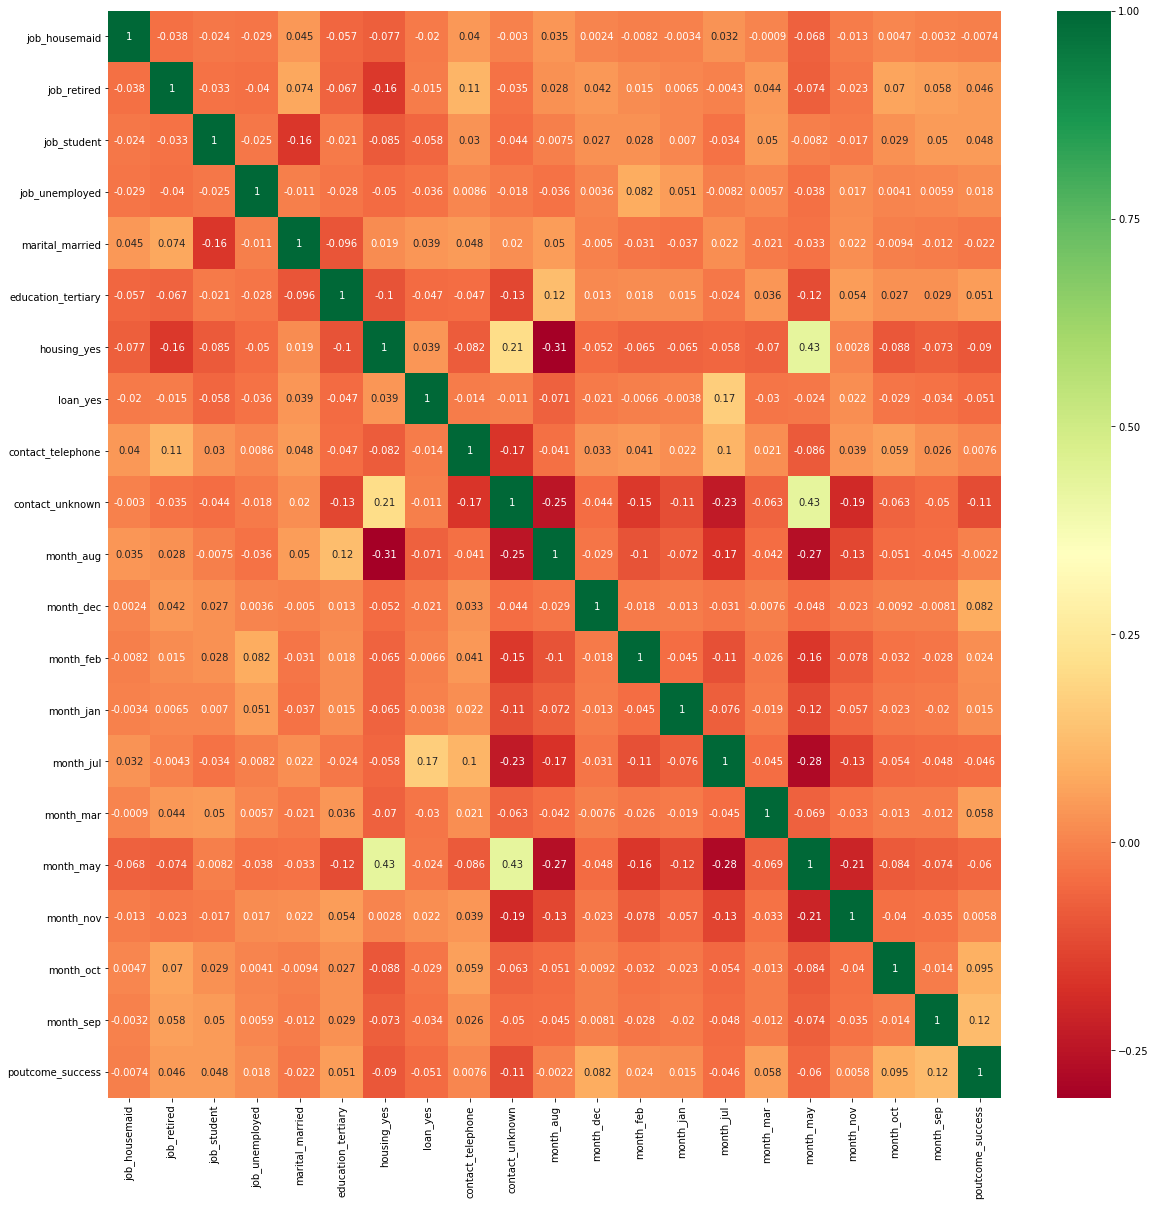

In [44]:
plt.subplots(figsize = (20,20))
sns.heatmap(X_model.corr(), annot=True, cmap = "RdYlGn")
plt.show()

In [45]:
#X=bankPromoDumm_df[X_train.columns[rfe.support_]]

#X_train , X_test ,  y_train  , y_test = train_test_split(X_model , y_model , test_size = 0.2 , random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_model, y_model)

C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
X_test_model = X_test[X_test.columns[rfe.support_]]
y_test_model = y_test


In [48]:
y_pred = logreg.predict(X_test_model)

In [49]:
y_pred_proba = logreg.predict_proba(X_test_model)[:, 1]

In [50]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

[fpr, tpr , thr] = roc_curve(y_test_model, y_pred_proba)

Train/Test split results:
LogisticRegression accuracy is 0.889
LogisticRegression log_loss is 0.308
LogisticRegression auc is 0.754


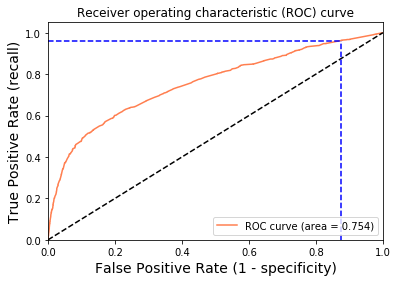

Using a threshold of 0.029 guarantees a sensitivity of 0.962 and a specificity of 0.126, i.e. a false positive rate of 87.44%.


In [51]:
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_model, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_model, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in cross-validation loop to find the optimal number of the best number of fetures.


In [59]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#create the RFE object and compute a cross-validated score
#accuracy score is proportional to number of correct classifications

est = LogisticRegression()
rfecv = RFECV(estimator=est, step=1 , cv=StratifiedKFold(2), scoring ='accuracy')
rfecv.fit(X_train,y_train.values.ravel())

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

Optimal number of features: 42
Selected features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


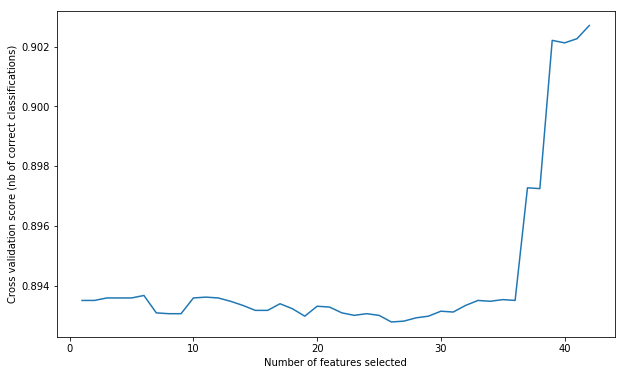

In [61]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [72]:
## calculate accuracy
from sklearn.model_selection import cross_val_score

lr_initial_score = cross_val_score(gb_model,X_train, y_train , cv=StratifiedKFold(2), scoring ='accuracy').mean()
print(" Initial Accuracy score : {} " .format(lr_initial_score))
#X_new_gb = 

lr_fe_score = cross_val_score(gb_model,X_train[X_train.columns[rfecv.support_]], y_train ,  cv=StratifiedKFold(2), scoring ='accuracy').mean()
print(" Accuracy after feature selection : {} " .format(lr_fe_score))

C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Initial Accuracy score : 0.9055795178057953 


C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Accuracy after feature selection : 0.9055518690555187 


In [65]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

#create the RFE object and compute a cross-validated score
#accuracy score is proportional to number of correct classifications

gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1 , cv=StratifiedKFold(2), scoring ='accuracy')
gb_rfecv.fit(X_train,y_train.values.ravel())

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

Optimal number of features: 23
Selected features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'marital_married', 'education_tertiary', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jul', 'month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep', 'poutcome_success']


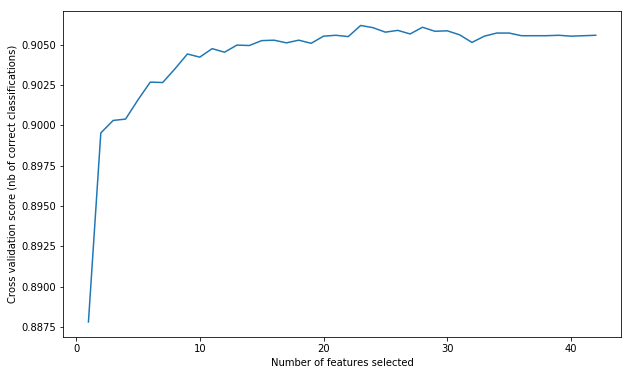

In [66]:
print("Optimal number of features: %d" % gb_rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[gb_rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [71]:
## calculate accuracy
from sklearn.model_selection import cross_val_score

gb_initial_score = cross_val_score(gb_model,X_train, y_train , cv=StratifiedKFold(2), scoring ='accuracy').mean()
print(" Initial Accuracy score : {} " .format(gb_initial_score))
#X_new_gb = 

gb_fe_score = cross_val_score(gb_model,X_train[X_train.columns[gb_rfecv.support_]], y_train ,  cv=StratifiedKFold(2), scoring ='accuracy').mean()
print(" Accuracy after feature selection : {} " .format(gb_fe_score))

C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Initial Accuracy score : 0.9055242203052423 


C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Accuracy after feature selection : 0.9053583278035833 


In [ ]:

X_rfecv_model = X_train[X_train.columns[rfecv.support_]]
#y_model = pd.DataFrame(y_train['Subscribed'])
y_rfecv_model = y_train
#y_rfecv_model = y_train['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
#y_model['Subscribed_int'] = y_model['Subscribed_int'].astype(np.int)
#del y_model['Subscribed']

print(X_rfecv_model.shape)
print(y_rfecv_model.shape)

print(isinstance(X_rfecv_model, pd.DataFrame))
print(isinstance(y_rfecv_model, pd.DataFrame))

# check input data
np.asarray(y_rfecv_model)
np.asarray(X_rfecv_model)

In [185]:
## Model evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


In [203]:
logreg_rfecv = LogisticRegression()
logreg_rfecv.fit(X_rfecv_model, y_rfecv_model)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [206]:
X_rfecv_test = X_test[X_test.columns[rfecv.support_]]
y_rfecv_test= y_test['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)

print(X_rfecv_test.shape)
print(y_rfecv_test.shape)
#y_rfecv_pred = logreg.predict(X_rfecv_test)
#y_rfecv_pred_proba = logreg.predict_proba(X_rfecv_test)[:, 1]

(9043, 48)
(9043,)


In [207]:
y_rfecv_pred = logreg_rfecv.predict(X_rfecv_test)
y_rfecv_pred_proba = logreg.predict_proba(X_rfecv_test)[:, 1]

In [212]:
[rfecv_fpr, rfecv_tpr, rfecv_thr] = roc_curve(y_rfecv_test, y_rfecv_pred)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_rfecv_test, y_rfecv_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_rfecv_test, y_rfecv_pred))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(rfecv_fpr, rfecv_tpr))

rfecv_idx = np.min(np.where(rfecv_tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95


Train/Test split results:
LogisticRegression accuracy is 0.898
LogisticRegression log_loss is 3.506
LogisticRegression auc is 0.660


In [211]:
y_rfecv_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
## TODO : Over-sampling using SMOTE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False  True  True  True  True  True  True  True False  True
  True False False False  True False]
[17 22 20 19 16 21 18  1  1  1  1  1  1  1  1  1  1  1  6  7  8 10  9 14
  5 11 12  1  1  1  1  1  1  1  4  1  1  2  3 13  1 15]


In [90]:


print(os_data_X.columns[rfe.ranking_==1])
print(os_data_X.columns[rfe.support_])

# rfe.support_ considers fatures with ranking=1 ( ranking =1 , are the features to be selected ) 
Xs_model = os_data_X[os_data_X.columns[rfe.support_]]
ys_model = os_data_y

print(Xs_model.shape)
print(ys_model.shape)

print(isinstance(Xs_model, pd.DataFrame))
print(isinstance(ys_model, pd.DataFrame))

# check input data
print(np.asarray(ys_model))
print(np.asarray(Xs_model))


Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_may', 'month_nov', 'poutcome_success'],
      dtype='object')
Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_may', 'month_nov', 'poutcome_success'],
      dtype='object')
(63884, 21)
(63884, 1)
True
True
[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [91]:
import statsmodels.api as sm

logit_model=sm.Logit(ys_model, Xs_model)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.513148
         Iterations 6
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.260     
Dependent Variable:  y                AIC:              65605.8758
Date:                2019-02-16 18:13 BIC:              65796.2371
No. Observations:    63884            Log-Likelihood:   -32782.   
Df Model:            20               LL-Null:          -44281.   
Df Residuals:        63863            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
job_blue-collar   -0.7315   0.0370 -19.7679 0.0000 -0.8040 -0.6590
job_entrepreneur  -1.1435   0.1037 -11.0229 0.0000 -1

(63884, 21)
(63884, 1)


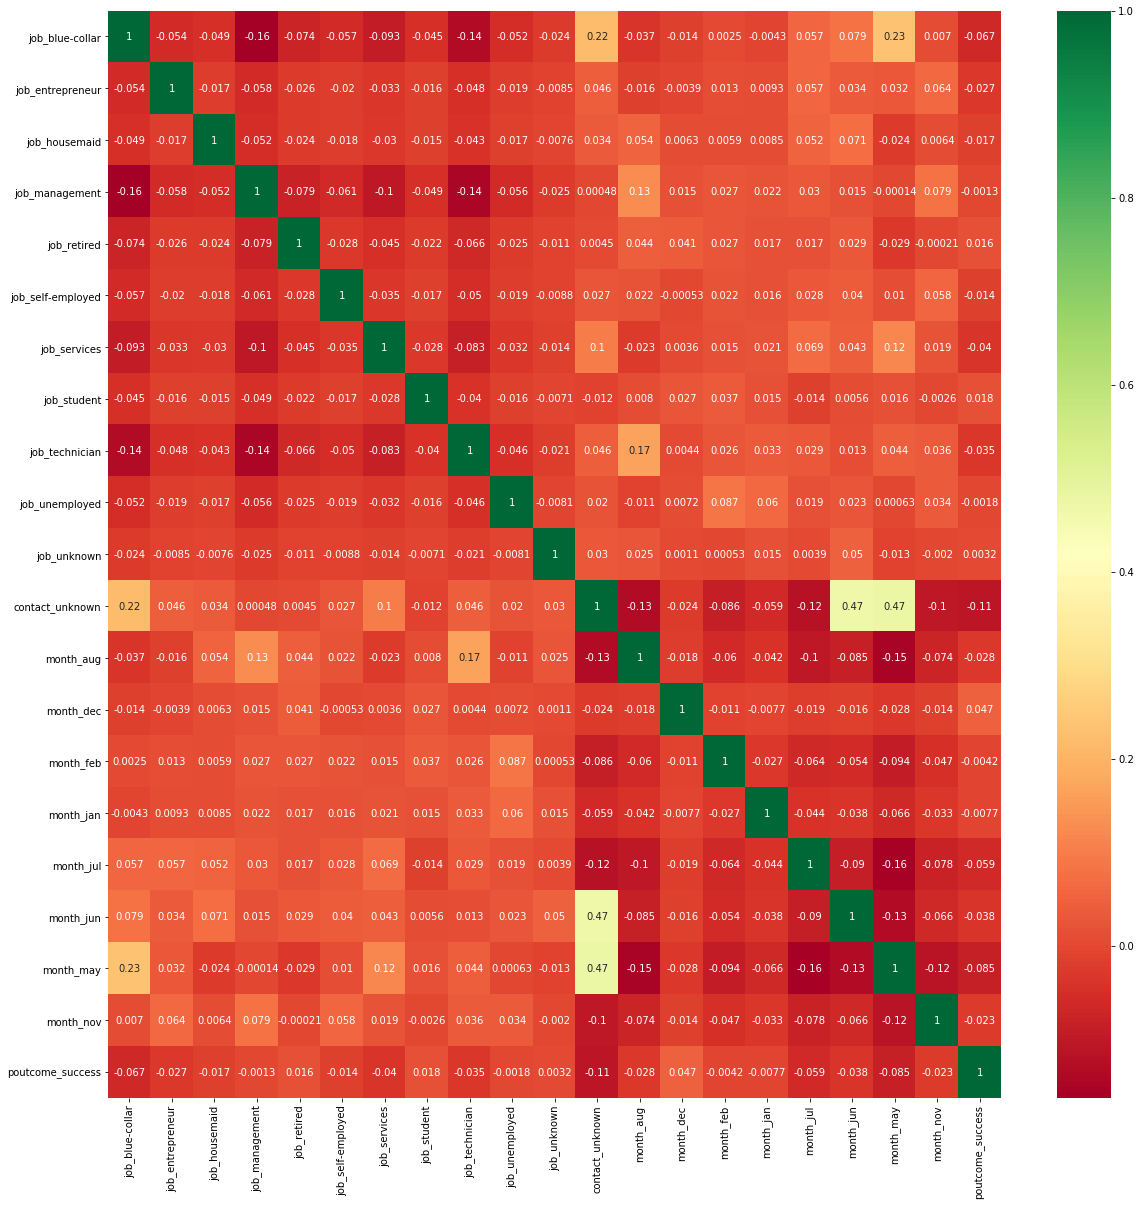

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

print(Xs_model.shape)
print(ys_model.shape)

plt.subplots(figsize = (20,20))
sns.heatmap(Xs_model.corr(), annot=True, cmap = "RdYlGn")
plt.show()



In [95]:
#X=bankPromoDumm_df[X_train.columns[rfe.support_]]

Xs_train , Xs_test ,  ys_train  , ys_test = train_test_split(Xs_model , ys_model , test_size = 0.2 , random_state = 0)
logreg = LogisticRegression()
logreg.fit(Xs_model, ys_model)

#Xs_test_model = Xs_test[Xs_test.columns[rfe.support_]]
#ys_test_model = ys_test

ys_pred = logreg.predict(Xs_test)

ys_pred_proba = logreg.predict_proba(Xs_test)[:, 1]


C:\Users\tanvi\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train/Test split results:
LogisticRegression accuracy is 0.874
LogisticRegression log_loss is 0.300
LogisticRegression auc is 0.940


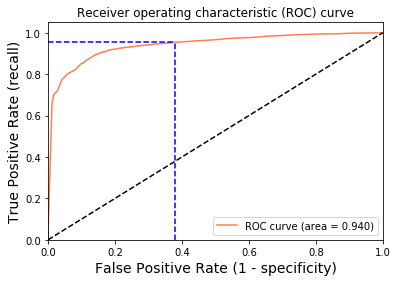

Using a threshold of 0.120 guarantees a sensitivity of 0.953 and a specificity of 0.621, i.e. a false positive rate of 37.91%.


In [96]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

[fpr, tpr , thr] = roc_curve(ys_test, ys_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(ys_test, ys_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(ys_test, ys_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [97]:
from sklearn.metrics import classification_report
print(classification_report(ys_test, ys_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      6299
           1       0.86      0.90      0.88      6478

   micro avg       0.87      0.87      0.87     12777
   macro avg       0.87      0.87      0.87     12777
weighted avg       0.87      0.87      0.87     12777



In [ ]:
## Implementing hte model

import statsmodels.api as sm

logit_model=sm.Logit(y_model, X_model)
result = logit_model.fit()
print(result.summary2())